# Данные

В этой работе ваша задача – построить визуализации для совместного распределения данных по датасету об уровне стресса и выгорания людей, работающих в разных компаниях ([Are Your Employees Burning Out?](https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out?select=train.csv)).

### Этапы выполнения работы:
1. Снова объединитесь с коллегой, с которым вы выполняли первую праткическую работу. ***Если вы выполняли первую работу в одиночестве, напроситесь к кому-то третьим. Выполнять в одиночку эту работу некомфортно.***
2. По датасету каждый из коллег самостоятельно выполняет задания. Задания намеренно сформулированы нечетко и допускают разночтения и разные гипотезы.
3. Когда задания будут выполнены всеми в команде, критически проанализируйте получившиеся визуализации. По каждому заданию выберите наиболее удачную визуализацию.
- Может быть так, что у вас все варианты оказались удачными. → Внесите в финальный блокнот все.
- Может быть так, что вы решите, что ни один из вариантов не подходит для демонстрации рассматриваемой характеристики данных. → Совместно придумайте подходящую визуализацию.
4. У каждого из вас есть блокнот со своим решением и один блокнот с общим. Загрузить на Piazza надо будет все варианты работы. При защите – показать и обосновать только общую финальную версию.

Для выполнения работы можно использовать любые библиотеки для визуализации данных на Python.

Перед (в процессе) построением графиков можно сделать легкую предобработку, но досконально разбираться в качестве данных не нужно. Будем считать, что данные согласованны.

Защита будет включать обсуждение вашей работы и одно задание на визуализацию по тому же датасету, что вы анализировали.

In [ ]:
import pandas as pd

## Датасет и задание

Для выполнения заданий возьмите таблицу `train.csv`.

In [ ]:
burn_out = pd.read_csv("train.csv")
display(burn_out.head())
burn_out.shape

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


(22750, 9)

Датасет содержит около 23к строк и 9 столбцов:
- `Employee ID`: Уникальный идентификатор сотрудника (пример: fffe390032003000)
- `Date of Joining`: Дата трудоустройства (пример: 2008-12-30)
- `Gender`: Пол сотрудника (Male/Female)
- `Company Type`: Тип компании (Service/Product)
- `WFH Setup Available`: Есть ли возможность работать из дома (Yes/No)
- `Designation`: Статус сотрудника в диапазоне от 0 до 5.
- `Resource Allocation`: Количество рабочих часов от 1 до 10.
- `Mental Fatigue Score`: Уровень психологической усталости от 0 до 10.
- `Burn Rate`: Степень выгорания сотрудника от 0 до 1.

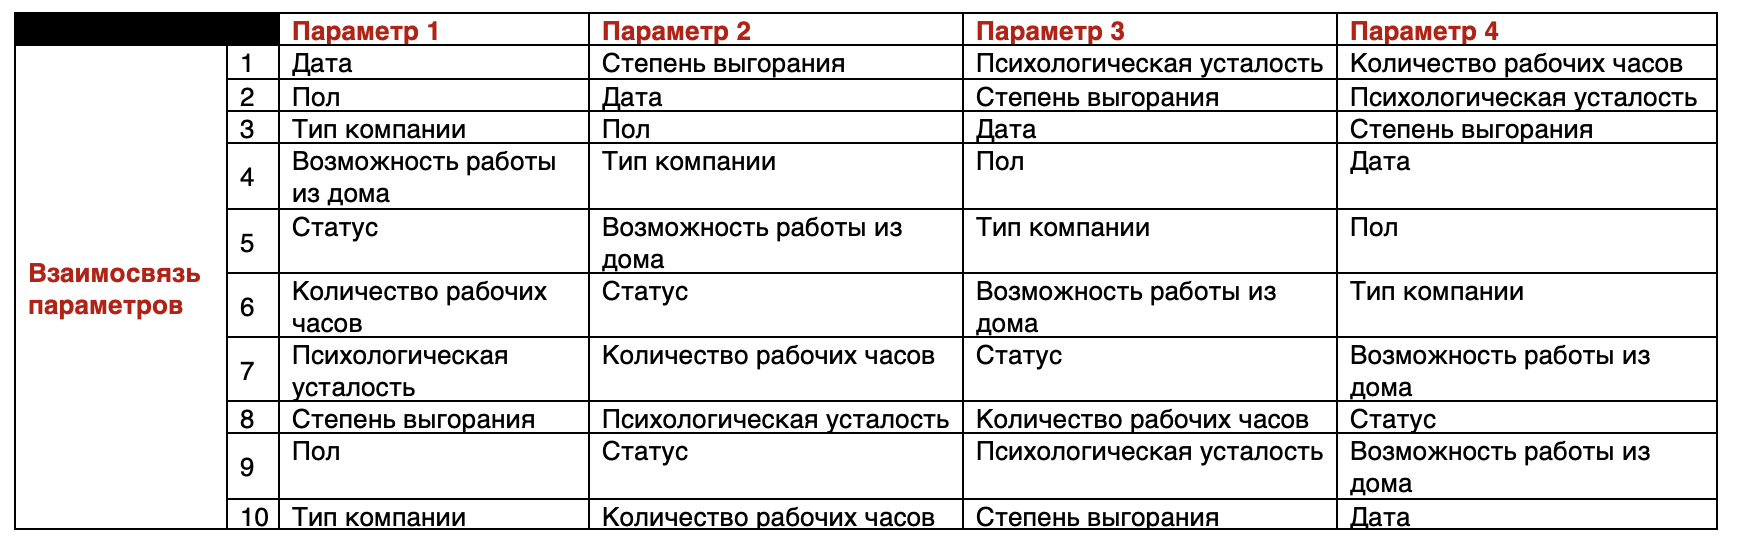

> **Рекомендация:** на основе предложенных в заданиях параметров стройте гипотезы для визуализации.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Психологическая усталость сотрудников прямо пропорциональна количеству рабочих часов и друг другу


Text(0.5, 1.0, 'Сorrelation table')

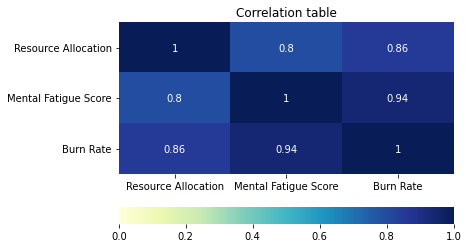

In [ ]:
cor_matrix = burn_out[["Resource Allocation", "Mental Fatigue Score", "Burn Rate"]].corr()
sns.heatmap(data=cor_matrix, annot=True, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"},vmin=0).set_title('Сorrelation table')

Все верно. Более того, психологическая усталость и выгорание обладают коэффициентом кореляции более 0.9, что неудивительно, учитывая взаимодополняемость этих состояний

Чем больше работает человек, тем больше у него уровень выгорания.

Чем выше психологическая усталость, тем больше уровень выгорания.



Text(0.5, 0.98, 'Mental Fatigue and Burn Rate growth: resourse allocation')

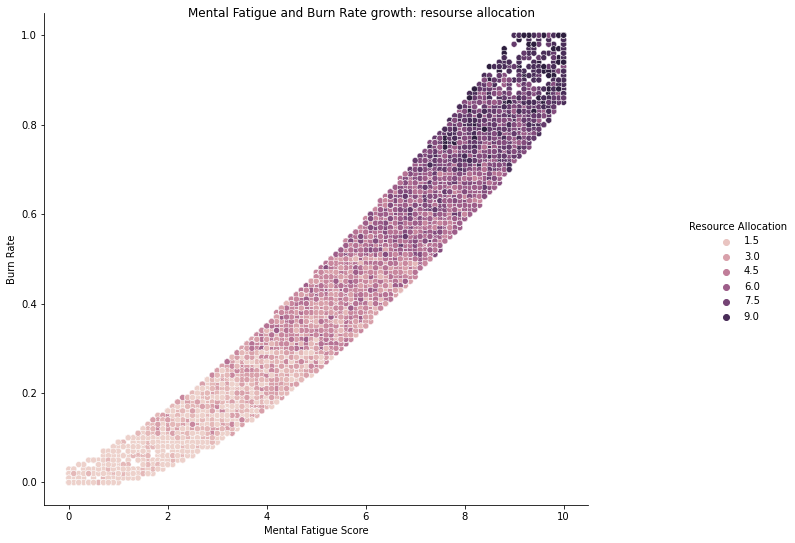

In [ ]:
g = sns.relplot(data=burn_out, x="Mental Fatigue Score", y="Burn Rate", hue="Resource Allocation")
g.fig.set_size_inches(12, 8)
g.fig.suptitle("Mental Fatigue and Burn Rate growth: resourse allocation", fontsize=12)

Гипотеза подтверждена

2. Сильно связанные между собой психологическая усталось и степень выгорания слабо зависят от пола и не зависят от даты






In [ ]:
burn_out["Gender_norm"] = burn_out["Gender"].map({'Male': 1, 'Female': 0})

In [ ]:
burn_out['Date of Joining'] = pd.to_datetime(burn_out['Date of Joining'])
burn_out['Date'] = burn_out['Date of Joining'] - burn_out['Date of Joining'].min()
burn_out['Date'] = burn_out['Date'].astype(str)
burn_out['Date'] = burn_out['Date'].str.replace(' days', '')
burn_out['Date'] = burn_out['Date'].astype(int)

Text(0.5, 1.0, 'Mental failture correlation table')

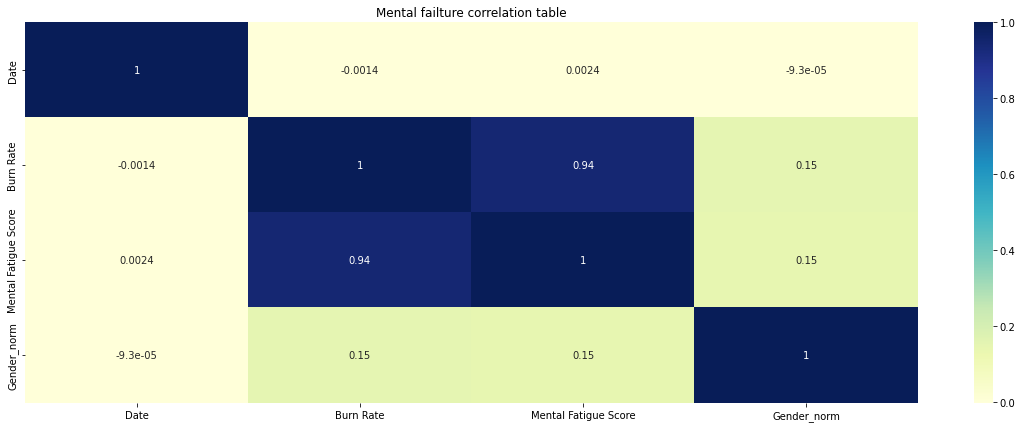

In [ ]:
cor_matrix = burn_out[["Date", "Burn Rate", "Mental Fatigue Score", "Gender_norm"]].corr()
cor_matrix
fig, axis = plt.subplots(0, 2, figsize=(20, 7))
sns.heatmap(data=cor_matrix, annot=True, cmap="YlGnBu").set_title("Mental failture correlation table")

На графике видна взаимосвязь степени выгорания и психологической усталости (было очевидно). Видно, что время от первого трудоустройства, никак не коррелирует с другими данными. Также можно заметить, что какой-то из гендеров более подвержен психической усталости и выгоранию



3. В сервисе выгорают больше

Text(0.5, 1.0, 'Burn rate for comnanies of each type(Man)')

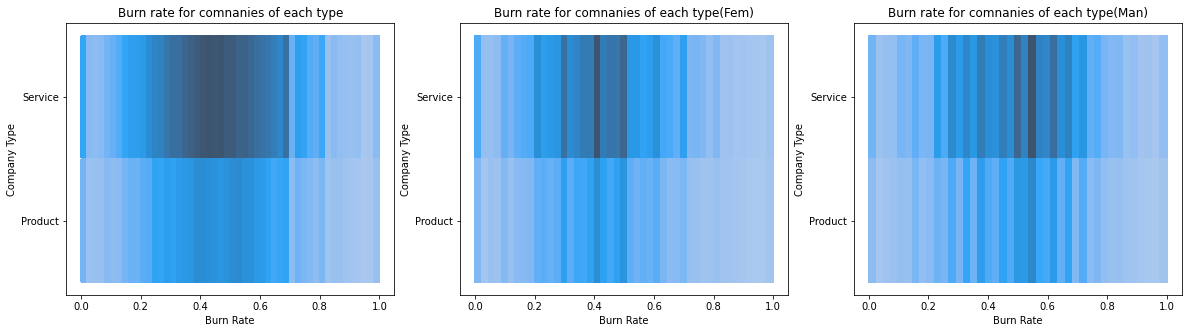

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(ax=axis[0],data=burn_out, x="Burn Rate", y="Company Type", legend=True).set_title('Burn rate for comnanies of each type')
sns.histplot(ax=axis[1],data=burn_out.loc[(burn_out["Gender"]=="Female")], x="Burn Rate", y="Company Type", legend=True).set_title('Burn rate for comnanies of each type(Fem)')
sns.histplot(ax=axis[2],data=burn_out.loc[(burn_out["Gender"]=="Male")], x="Burn Rate", y="Company Type", legend=True).set_title('Burn rate for comnanies of each type(Man)')

Гипотеза подтвердилась. Хотя - возможно в сервисе просто работает больше людей. Посмотрим на другую диаграмму, чтобы лучше понять средние значения

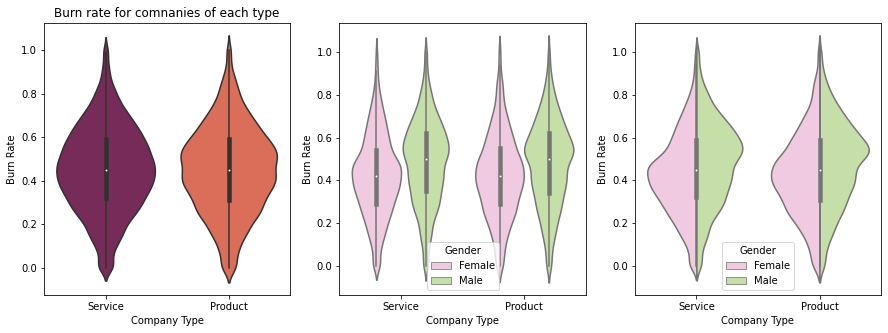

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(ax=axis[0], data=burn_out, x="Company Type", y="Burn Rate",palette="rocket").set_title('Burn rate for comnanies of each type')
sns.violinplot(ax=axis[1], data=burn_out, x="Company Type", y="Burn Rate", hue="Gender",palette="PiYG")
sns.violinplot(ax=axis[2], data=burn_out, x="Company Type", y="Burn Rate", hue="Gender",palette="PiYG", split=True)

Итого, степень выгорания больше зависит от пола, нежели от типа компании. Больше выгорают мужчины.

4. Женщины больше работают из дома

In [ ]:
df_wfh = burn_out.loc[(burn_out['WFH Setup Available']=="Yes")]


Text(0.5, 1.0, 'WFH - Male vs Female')

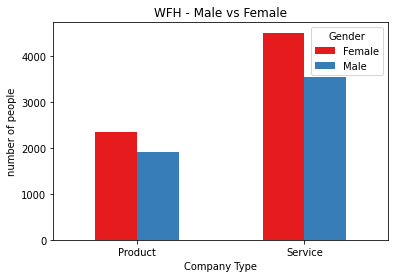

In [ ]:
sns.set_palette("Set1")
sns.crayon_palette(["Midnight Blue", "Maroon"])
p_table = pd.crosstab(index=df_wfh['Company Type'],
                                   values=df_wfh.Gender,
                                   columns=df_wfh.Gender, aggfunc="count").fillna(0)
p_table.plot(kind="bar", xlabel="Company Type", ylabel="number of people", rot=0).set_title("WFH - Male vs Female")

Гипотеза подтвердилась для обоих типов компаний.

5. В продуктовом типе компаний больше возможностей работать из дома, а высокостатусные работники чаще работают в офисе


Text(0.5, 1.0, 'WFH: designation')

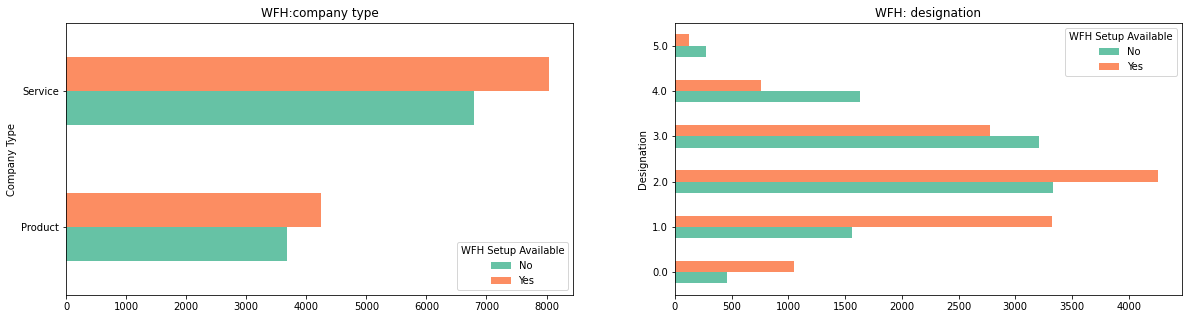

In [ ]:
sns.set_palette("Set2")

fig, axis = plt.subplots(1, 2, figsize=(20,5))
p_table = pd.crosstab(index=burn_out["Company Type"], values=burn_out["Company Type"], columns=burn_out["WFH Setup Available"], aggfunc="count").fillna(0)
p_table.plot(ax=axis[0],kind="barh", ylabel="Company Type").set_title("WFH:company type")
p_table = pd.crosstab(index=burn_out["Designation"], values=burn_out["Company Type"], columns=burn_out["WFH Setup Available"], aggfunc="count").fillna(0)
p_table.plot(ax=axis[1],kind="barh", ylabel="Designation").set_title("WFH: designation")

В сервисе работают дома немногим больше. С 3 уровня работники больше работают в офисе, чем дома

Среди сотруников с более высоким статусом больше мужчин.

Text(0.5, 1.0, 'Designation and Genders')

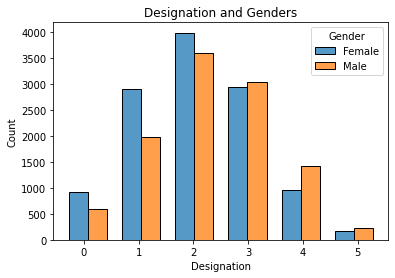

In [ ]:
sns.histplot( data=burn_out, x="Designation", hue="Gender", multiple="dodge", shrink=5).set_title("Designation and Genders")

Гипотеза подтвердилась. На высоком статусе главенствуют мужчины, на низких - женщины

6. С ростом статуса растет количество рабочих часов


In [ ]:
import plotly.express as px

Text(0.5, 0.98, 'Workig hours(Designation)')

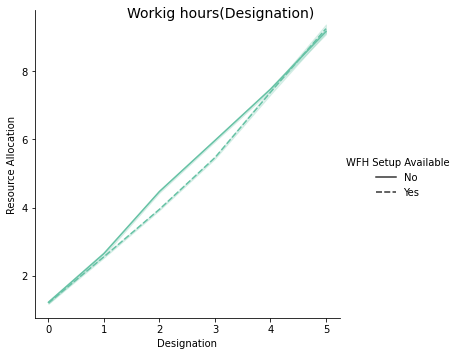

In [ ]:
p = sns.relplot(data=burn_out, y="Resource Allocation", x="Designation", kind="line",style="WFH Setup Available")
p.fig.suptitle('Workig hours(Designation)', fontsize=14)

Гипотеза верна - для работающих как в офисе, так и дома, сотрудников. У тех, кто имеет возможность быть дома, количество часов растет более плавно

7. Люди высокого статуса больше психологически устают



Text(0.5, 1.0, 'Mental fatigue(Designation)')

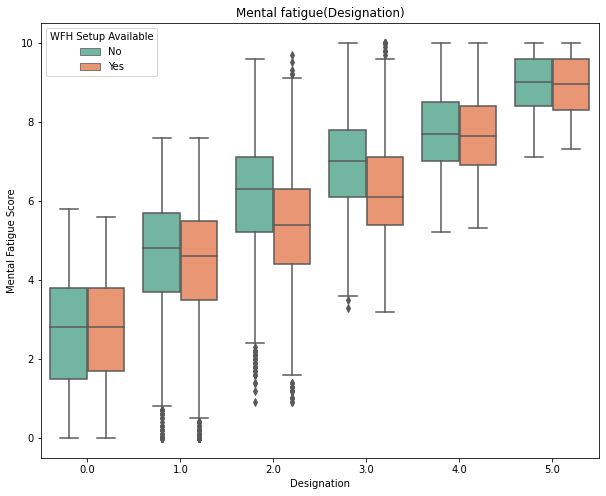

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=burn_out,x="Designation", y="Mental Fatigue Score",hue="WFH Setup Available").set_title("Mental fatigue(Designation)")

Действительно, статус не позволяет расслабляться, и у людей накапливается психологическая усталость. У имеющих возможность работать дома картинка не сильно лучше, но тем не менее на средних статусах( с 1 по 4) им легче

8. Психологическая усталость прямо пропорциональна рабочим часам

Text(0.5, 1.0, 'Mental Fatigue(Working hours)')

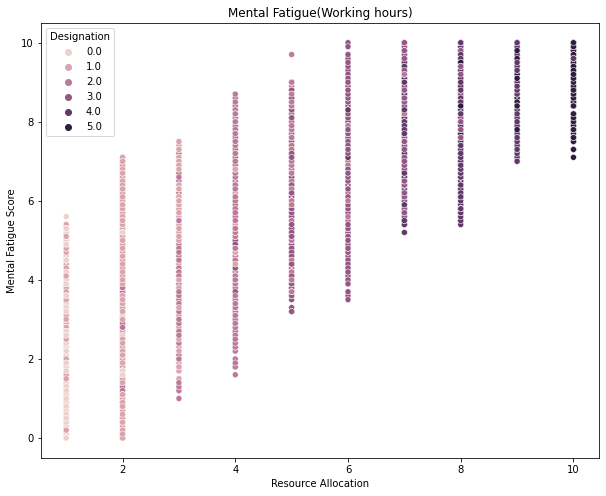

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=burn_out, x="Resource Allocation",y="Mental Fatigue Score", hue="Designation").set_title("Mental Fatigue(Working hours)")

Гипотеза подтвердилась. Начиная с 8 часов нет шансов остаться хотя бы наполовину психически отдохнувшим. Заодно видим, что работники высокого статуса именно в эту категорию и попадают, и что в целом рабочие часы определяются статусом

9. Психологическая усталось меньше у людей, имеющих возожность работать из дома.

Text(0.5, 1.0, 'WFH and mental fatigue')

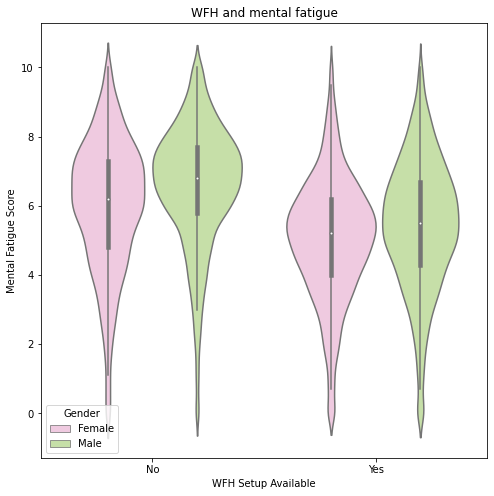

In [ ]:
plt.figure(figsize=(8, 8))
sns.violinplot(data=burn_out,x="WFH Setup Available", y="Mental Fatigue Score", hue="Gender",palette="PiYG").set_title("WFH and mental fatigue")


Гипотеза подтверждена, нахождение дома действительно более благотворно влияет на психику. Для мужчин и женщин ситуация не сильно статистически различется

10. Компании не проводили массового набора на стажировки в разный временной промежуток и не различаются по рабочим часам



Гипотеза подтвердилась, причем равномерно для обоих типов компаний

Text(0.5, 1.0, 'Data and resourse allocation: company type')

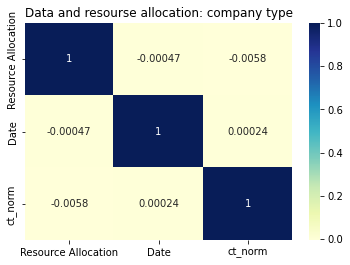

In [ ]:
burn_out["ct_norm"] = burn_out["Company Type"].map({'Product': 1, 'Service': 0})
cor_matrix = burn_out[["Resource Allocation", "Date", "ct_norm"]].corr()
cor_matrix
sns.heatmap( data=cor_matrix, annot=True, cmap="YlGnBu").set_title("Data and resourse allocation: company type")

Гипотеза подтверждена. От даты приссоединения вообще ничего не зависит, и во всех команиях работники работают в среднем по одной ставке рабочих часов